# Working with Linear Regression
We demonstrate basic and advanced usage of linear regression over the [House prices dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) <br> 



### 0. Imports

In [1]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Machine learning library
import sklearn

#Patterns Mining
from efficient_apriori import apriori

import warnings
warnings.filterwarnings("ignore")


##### Loading the CSV dataset

In [2]:
dataset_path = "../datasets/houseprices/train.csv"
dtf = pd.read_csv(dataset_path,index_col='Id')

##### Defining numeric and categorical columns

In [3]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique()>20]
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]
ordinals = list(set(numeric_columns) - set(very_numerical))

##### Filling Null Values with the column's mean

In [4]:
na_columns = dtf[very_numerical].isna().sum()
na_columns = na_columns[na_columns>0]
for nc in na_columns.index:
    dtf[nc].fillna(dtf[nc].mean(),inplace=True)

##### Dropping and filling NA values for categorical columns:

1. drop if at least 70% are NA:

In [5]:
nul_cols = dtf[categorical_columns].isna().sum()/len(dtf)
drop_us = nul_cols[nul_cols>0.7]

In [6]:
dtf=dtf.drop(drop_us.index,axis=1)
categorical_columns = list(set(categorical_columns)-set(drop_us.index))

2. Fill with a new 'na' category:

In [7]:
dtf[categorical_columns]= dtf[categorical_columns].fillna('na')

### 1. Simple Lienar Regression

In [16]:
Xcol = 'GrLivArea'
Ycol = 'SalePrice'

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

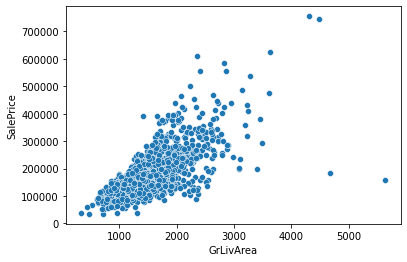

In [17]:
sns.scatterplot(x=Xcol,y=Ycol,data=dtf) 

#### 1.1 For visualization purposes, we can use Seaborn to draw the regression line

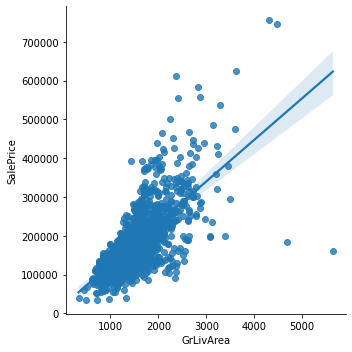

In [18]:
sns.lmplot(x=Xcol,y=Ycol,data=dtf,fit_reg=True) 

But we do not know anything about the quality of fitting, or the regression parameters

#### 1.2 We can use SK-Learn to fit the data

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
X = dtf[Xcol]
Y= dtf[Ycol]

In [64]:
model = LinearRegression()

As SK-Learn models requires a matrix as input, 
we need to convert our X array to a matrix using Numpy's `reshape` command.
Using `-1` we let numpy infer the size of the remaining dimension

In [65]:
X.shape

(1460,)

In [67]:
X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)

In [68]:
X.shape

(1460, 1)

In [33]:
Y_pred = model.fit(X,Y).predict(X)

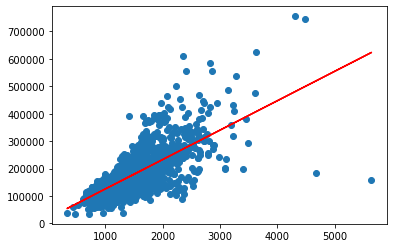

In [34]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

SK-Learn can give us the learned $\beta_0$ and $\beta_1$

In [35]:
model.coef_

array([107.13035897])

In [36]:
model.intercept_

18569.02585648722

##### Let us validate the derivation of $\beta_1$ as we saw in class
$\hat{\beta}_1 = \frac{s_{XY}}{s^2_{X}} =  \frac{\sum_{i}(x_i -\bar{x})(y_i-\bar{y})}{\sum_{i} (x_i - \bar{x})^2}$

In [69]:
X = dtf[Xcol]

In [70]:
sxy = np.sum( (X-X.mean()) * (Y-Y.mean()))
sxy

43159943578.38219

In [45]:
sxx = np.sum( np.square(X-X.mean()))

In [46]:
sxx

402873135.0760274

In [47]:
sxy/sxx

107.13035896582517

##### To make sure, let's also see the connection between $\beta_1$ and the correlation coefficient
$\hat{\beta}_1 = r_{XY} \cdot \frac{\sigma_Y}{\sigma_X} $

In [74]:
r = X.corr(Y)
r

0.7086244776126523

In [75]:
X.std(),Y.std()

(525.4803834232025, 79442.50288288662)

In [76]:
r*(Y.std()/X.std())

107.13035896582521

#### 1.3 Using StatsModels for a deeper understanding of the regression

In [77]:
model = sm.OLS(Y, X)

In [78]:
results = model.fit()

In [80]:
Y_pred = results.fittedvalues

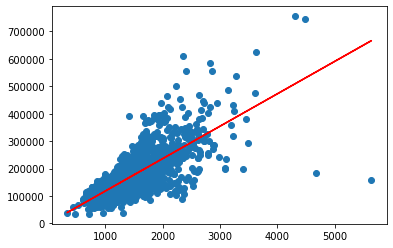

In [81]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:42:40   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    118.0691      0.920    128.337      0.000     116.264     119.874
==============================================================================
Omnibus:                      242.301   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.101
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      11.504   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""